In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans, KMeans

In [2]:
df = pd.read_pickle('./pickles/my_df.pickle')

In [3]:
#traverse df[vector] and finish with a matrix with all the words with it's values
alist = []
for i in range(len(df['vector'])):
    alist.append(np.array(list(df['vector'][i].values())))
arr = np.concatenate(alist)

In [4]:
arr.shape

(592, 300)

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
# We reduce the dimensions of the w2v to something we can represent
X_tsne = TSNE(learning_rate=200, perplexity=50).fit_transform(arr)
X_tsne.shape

(592, 2)

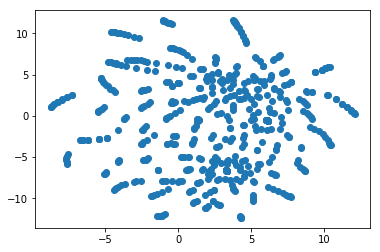

In [8]:
# Visualition of what TSNE gets from the dataset
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

In [9]:
# We try to 
kmeans = MiniBatchKMeans(n_clusters=3, random_state=10)
labels = kmeans.fit_predict(arr)

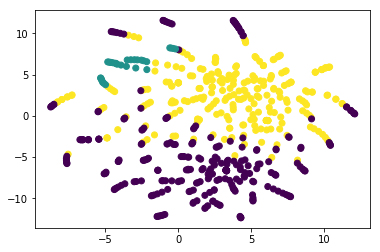

In [10]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels)

## K MEANS
dfdfdf

In [11]:
range_n_clusters = [2, 3, 4, 6, 8, 12]

/home/set92/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:256: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For n_clusters = 2 The average silhouette_score is : 0.461785


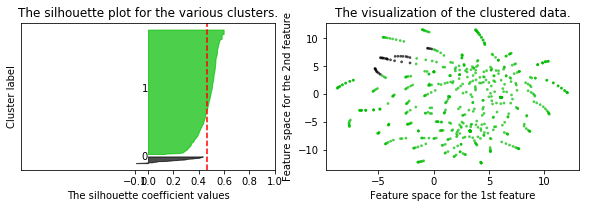

For n_clusters = 3 The average silhouette_score is : 0.144946


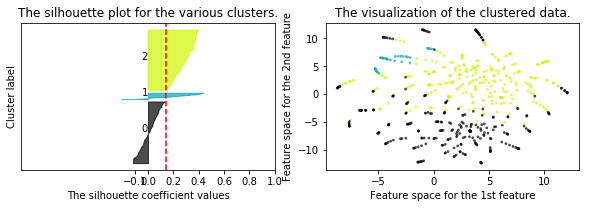

For n_clusters = 4 The average silhouette_score is : 0.169434


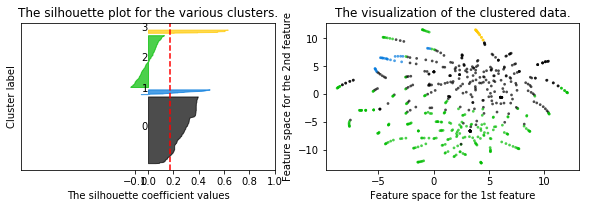

For n_clusters = 6 The average silhouette_score is : 0.141843


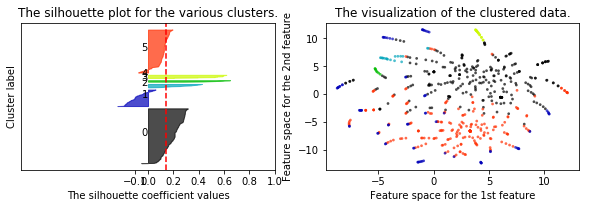

For n_clusters = 8 The average silhouette_score is : 0.0762464


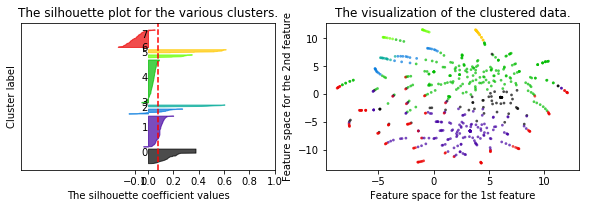

For n_clusters = 12 The average silhouette_score is : 0.0973951


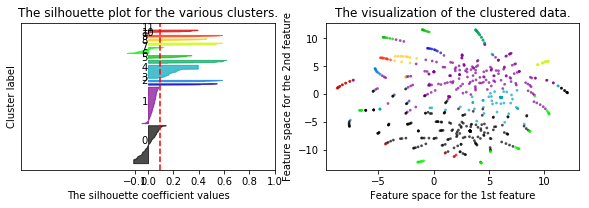

In [12]:
for n_clusters in range_n_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 3)
    ax1.set_xlim([-1, 1]) # rango de silhouette de -1 a 1
    
    kmeans = MiniBatchKMeans(n_clusters = n_clusters, random_state=10)
    labels = kmeans.fit_predict(arr)
    
    #For all the clusters we have we calculate the mean between all of them
    silhouette_avg = metrics.silhouette_score(arr, labels)
    
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
    # The metric for each cluster
    sample_silhouette_values = metrics.silhouette_samples(arr, labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Colorizing and plotting the barplot of 1st plot
        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd plot showing the actual clusters formed
    colors = cm.spectral(labels.astype(float) / n_clusters)
    ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    ax2.figure.subplots_adjust(bottom=0.2)
    ax2.figure.savefig('./figures/w2v_500_cluster%d_%f'% (n_clusters, silhouette_avg), format='eps', dpi=1200)

    plt.show()